In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_list = glob('data/*.csv')
file_list

['data/products.csv',
 'data/orders.csv',
 'data/LGBM_fin.csv',
 'data/order_products__train.csv',
 'data/departments.csv',
 'data/aisles.csv',
 'data/order_products__prior.csv',
 'data/sample_submission.csv']

In [3]:
# 물건 분류, 선반
aisles = pd.read_csv('data/aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
products = pd.read_csv('data/products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
departments = pd.read_csv('data/departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
orders = pd.read_csv('data/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [9]:
o_prior = orders[orders['eval_set']=='prior']
print(o_prior.shape)
o_prior.head()

(3214874, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
o_train = orders[orders['eval_set']=='train']
print(o_train.shape)
o_train.head()

(131209, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [11]:
o_test = orders[orders['eval_set']=='test']
print(o_test.shape)
o_test.head()

(75000, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [12]:
o_p_prior = pd.read_csv('data/order_products__prior.csv')
print(o_p_prior.shape)
o_p_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
o_p_train = pd.read_csv('data/order_products__train.csv')
print(o_p_train.shape)
o_p_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [14]:
submission = pd.read_csv('data/sample_submission.csv')
print(submission.shape)
submission.head(2)

(75000, 2)


,order_id,products
0,17,39276 29259
1,34,39276 29259


In [ ]:
orders.

In [15]:
products_aisles = pd.merge(products, aisles, on='aisle_id')

# aisle분류 중에 제품이 가장 많이 준비되어있는 분류 top10
products_aisles['aisle'].value_counts().head(10)

missing                 1258
candy chocolate         1246
ice cream ice           1091
vitamins supplements    1038
yogurt                  1026
chips pretzels           989
tea                      894
packaged cheese          891
frozen meals             880
cookies cakes            874
Name: aisle, dtype: int64

In [16]:
products_aisles_dpt = pd.merge(products_aisles, departments, on = 'department_id')

# department 중에 제품이 가장 많이 준비되어있는 분류 top10
display(products_aisles_dpt['department'].value_counts().head(10))
# department, aisle 중에 제품이 가장 많이 준비되어있는 분류 top10
display(products_aisles_dpt[['department','aisle']].value_counts().head(10))

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
Name: department, dtype: int64

department     aisle               
missing        missing                 1258
snacks         candy chocolate         1246
frozen         ice cream ice           1091
personal care  vitamins supplements    1038
dairy eggs     yogurt                  1026
snacks         chips pretzels           989
beverages      tea                      894
dairy eggs     packaged cheese          891
frozen         frozen meals             880
snacks         cookies cakes            874
dtype: int64

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4
5,47766,7409,Organic Avocado,24,4
6,47209,7293,Organic Hass Avocado,24,4
7,16797,6494,Strawberries,24,4
8,26209,6033,Limes,24,4
9,27966,5546,Organic Raspberries,123,4


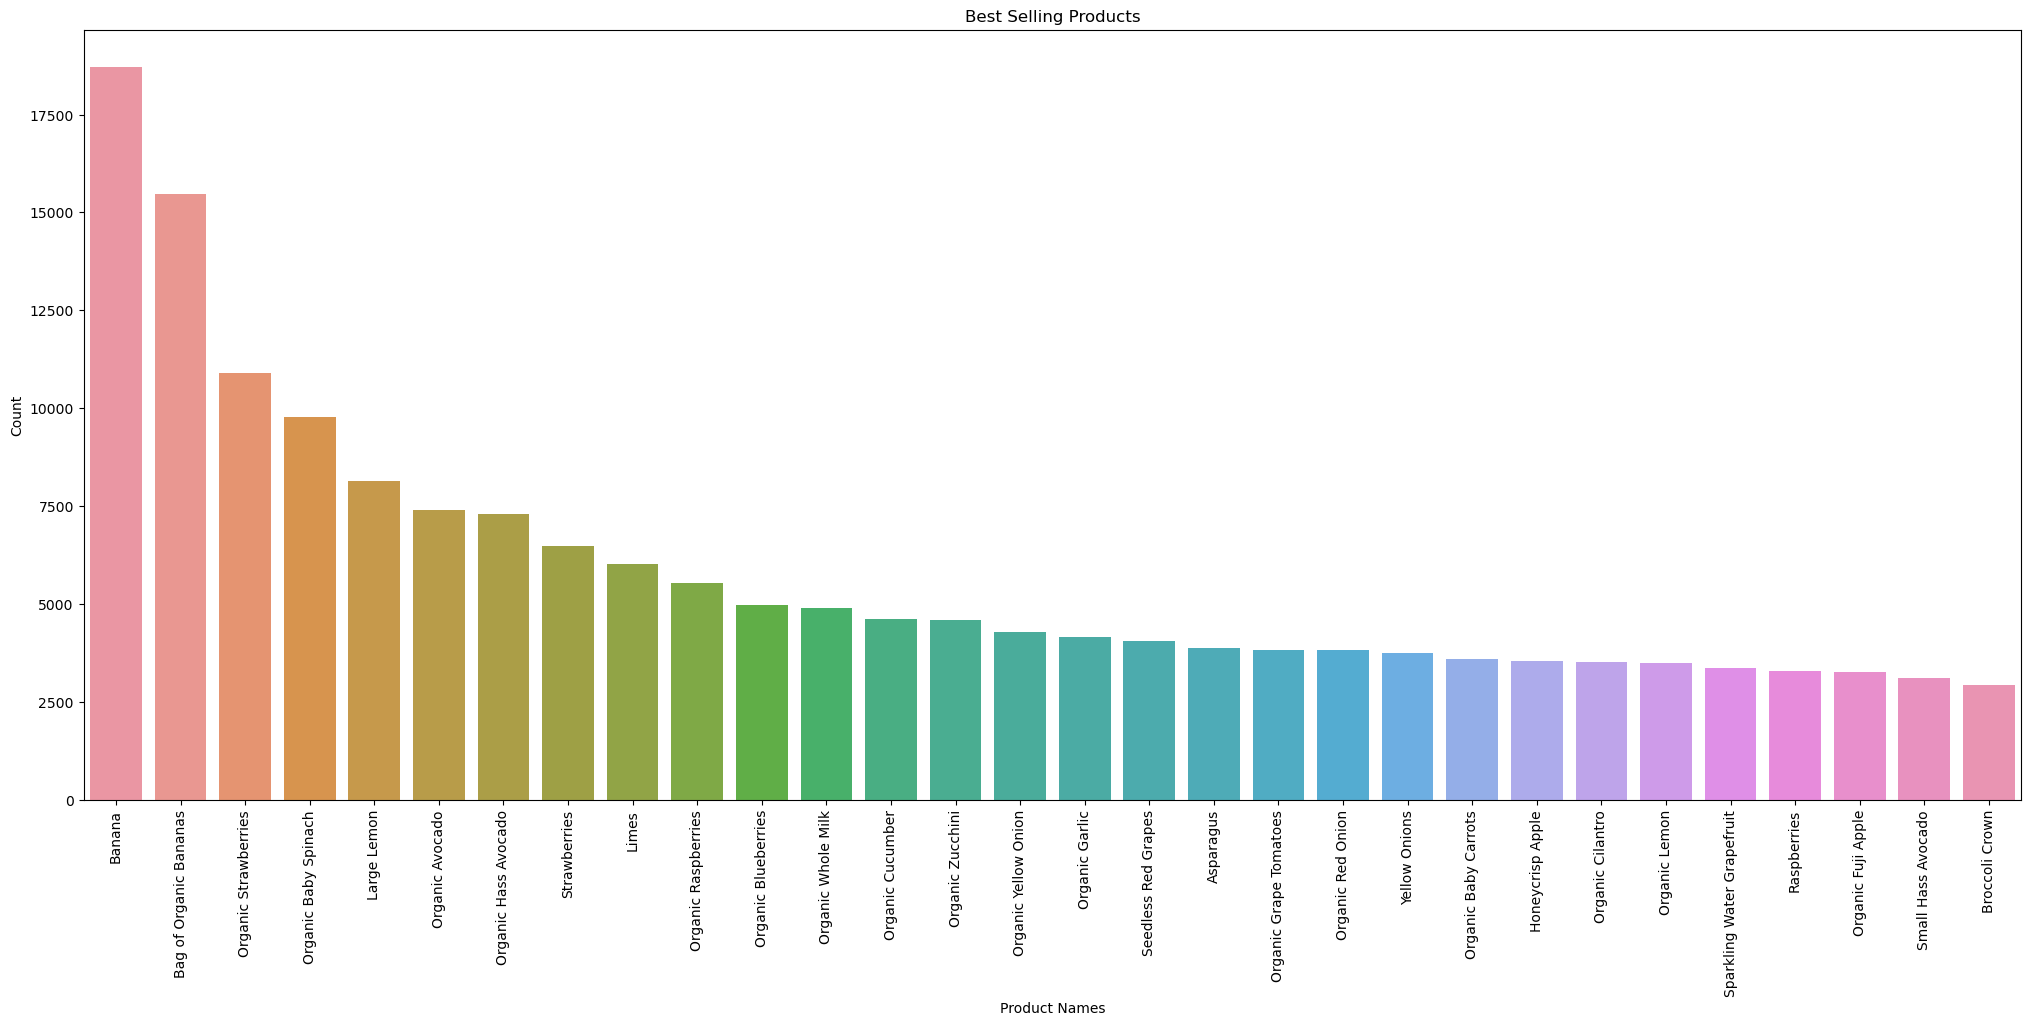

In [98]:
productsCount = o_p_train["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,products,how="left",on="product_id").sort_values(by="count",ascending=False)

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Best Selling Products")
plt.xticks(rotation=90)

mergedData.head(10)

In [51]:
# user_id 별 재주문율 확인

order_id_count = orders.groupby('user_id')['order_id'].count()
display(order_id_count.reset_index().head())
order_id_count.describe()
# 최소 4번, 많이 산 사람은 100번 넘게, 대부분의 사람들은 16번정도

,user_id,order_id
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

In [37]:
# 각 user_id별 재주문 몇 번
order_id_count.nlargest(30)

user_id
210     100
310     100
313     100
690     100
786     100
964     100
1024    100
1310    100
1420    100
1428    100
1549    100
1563    100
1666    100
1683    100
1868    100
1958    100
2231    100
2387    100
2405    100
3377    100
3514    100
3742    100
3960    100
4199    100
4229    100
4284    100
4356    100
4382    100
4490    100
4499    100
Name: order_id, dtype: int64

<Axes: xlabel='order_id', ylabel='count'>

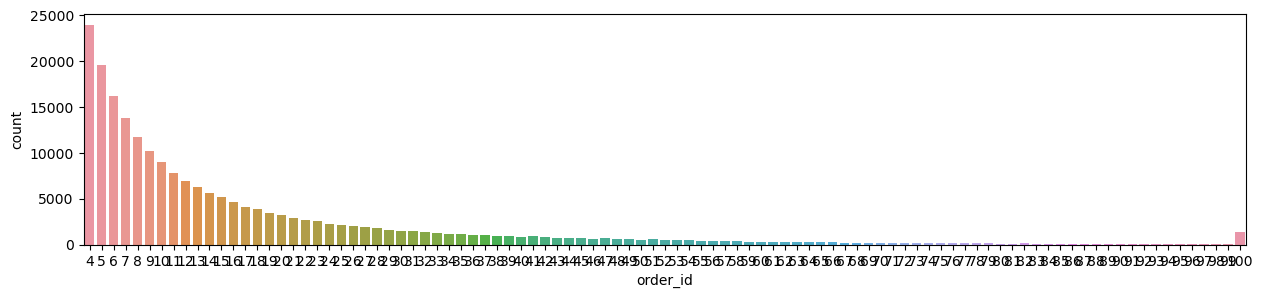

In [48]:
plt.figure(figsize = (15,3))

# 재구매율 횟수 확인해보기
sns.countplot(data = order_id_count.reset_index(), x='order_id')

<Axes: xlabel='order_hour_of_day', ylabel='count'>

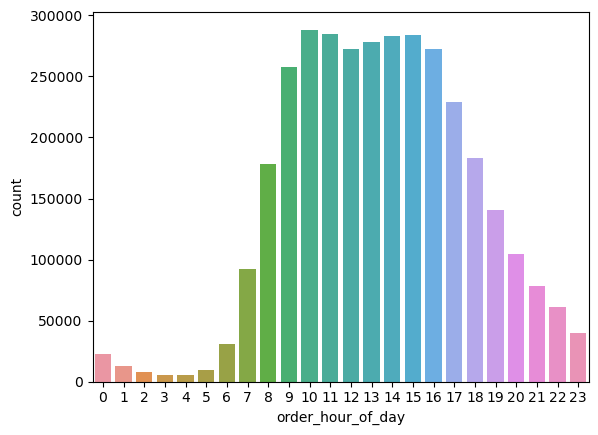

In [52]:
# 구매를 가장 많이 하는 시간
sns.countplot(data=orders, x = 'order_hour_of_day')

<Axes: xlabel='order_dow', ylabel='count'>

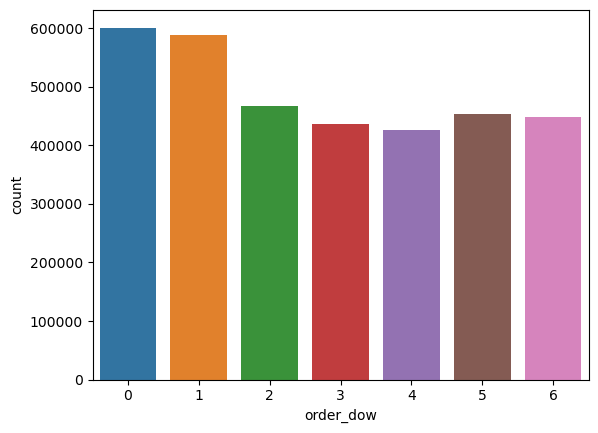

In [53]:
# 구매를 가장 많이 하는 요일
sns.countplot(data=orders, x = 'order_dow')

In [66]:
df_prior = pd.merge(o_p_prior, o_prior, on = 'order_id', how = 'left')
df_prior

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0


In [74]:
df_prior_id = df_prior.groupby(['user_id'])['product_id'].count().reset_index()
df_prior_id.nlargest(10, columns = 'product_id')

,user_id,product_id
201267,201268,3725
129927,129928,3638
164054,164055,3061
186703,186704,2936
176477,176478,2921
182400,182401,2907
137628,137629,2901
33730,33731,2888
108186,108187,2760
4693,4694,2735


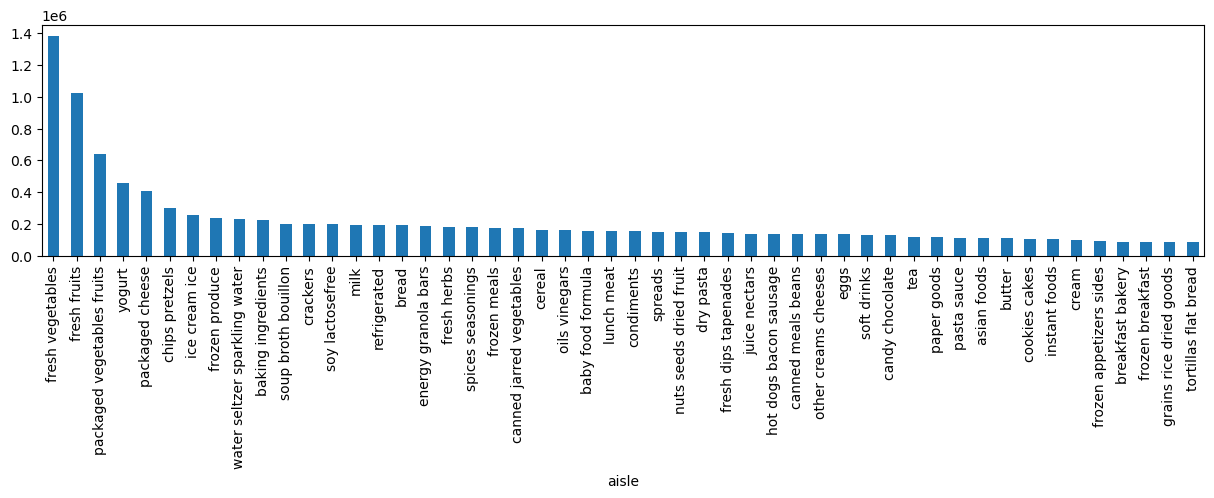

In [118]:
# 재주문이 아닌 물품 확인해보기
re_x_product_count = df_prior[df_prior['reordered']==0].groupby('product_id')['order_id'].count().reset_index()
re_x_product_count.columns = ['product_id','count']
aisle_count = re_x_product_count.merge(products_aisles, on = 'product_id').groupby('aisle')['count'].sum()

# 어떤 물품 종류가 하나만 사는지
plt.figure(figsize = (15,3))
aisle_count.sort_values(ascending=False).head(50).plot.bar();

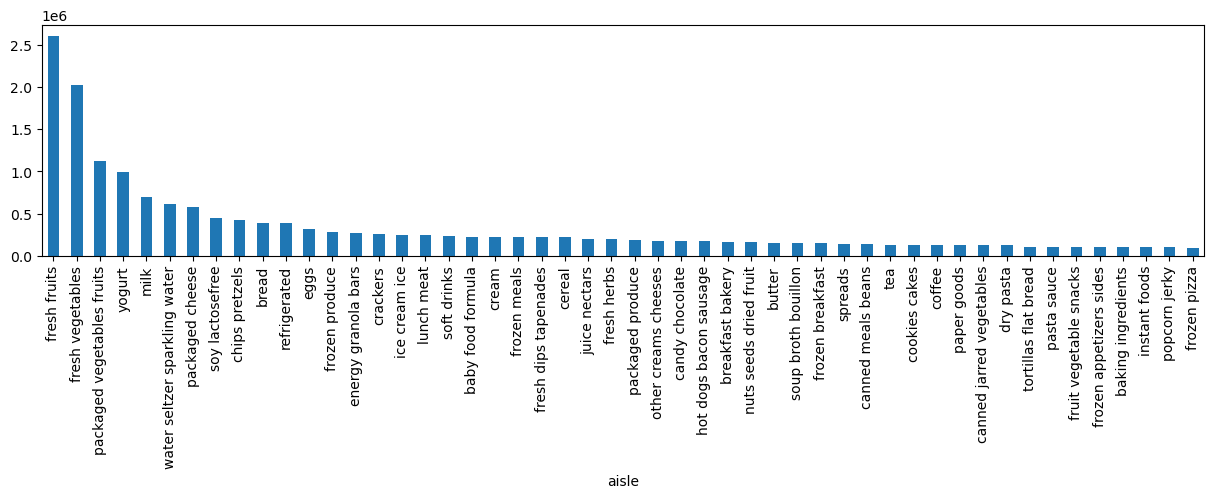

In [114]:
# 재주문인 물품 확인해보기
re_product_count = df_prior[df_prior['reordered']==1].groupby('product_id')['order_id'].count().reset_index()
re_product_count.columns = ['product_id','count']
aisle_count = re_product_count.merge(products_aisles, on = 'product_id').groupby('aisle')['count'].sum()

# 어떤 물품 종류가 재구매하는지 사는지
plt.figure(figsize = (15,3))
aisle_count.sort_values(ascending=False).head(50).plot.bar();

<Axes: xlabel='product_name'>

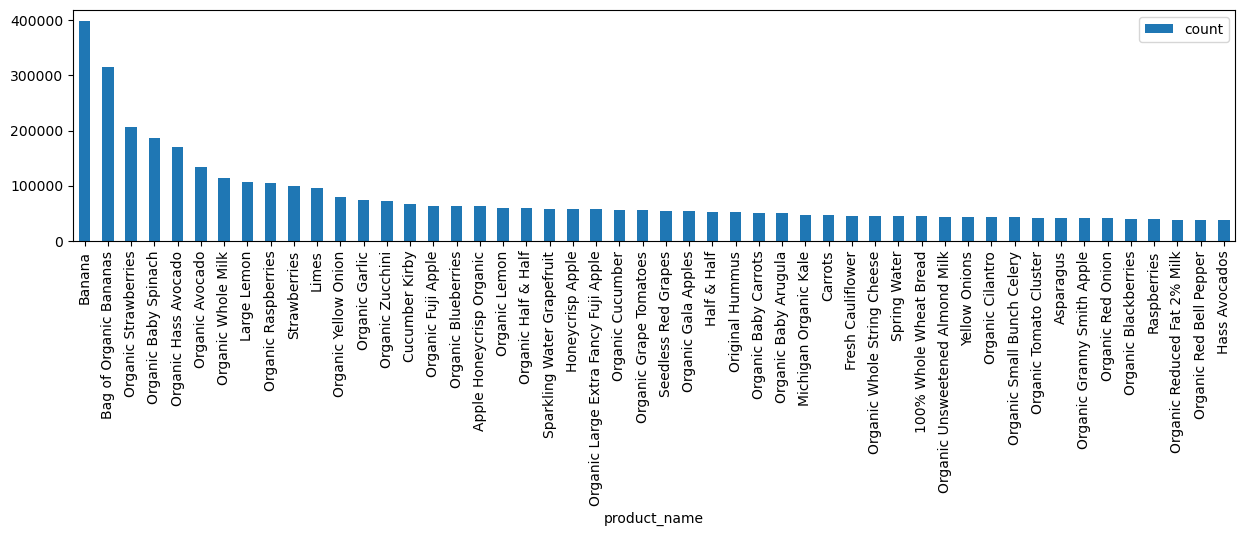

In [115]:
# 재주문인 물품 확인해보기
re_product_count.sort_values(by = 'count', ascending = False).merge(products).head(50).plot.bar(x = 'product_name', y ='count',figsize = (15,3))

In [90]:
aisle_count.nlargest(10)

aisle_id
83     1385849
24     1026719
123     638136
120     455325
21      406380
107     297083
37      253025
116     239621
115     227556
17      227024
Name: count, dtype: int64

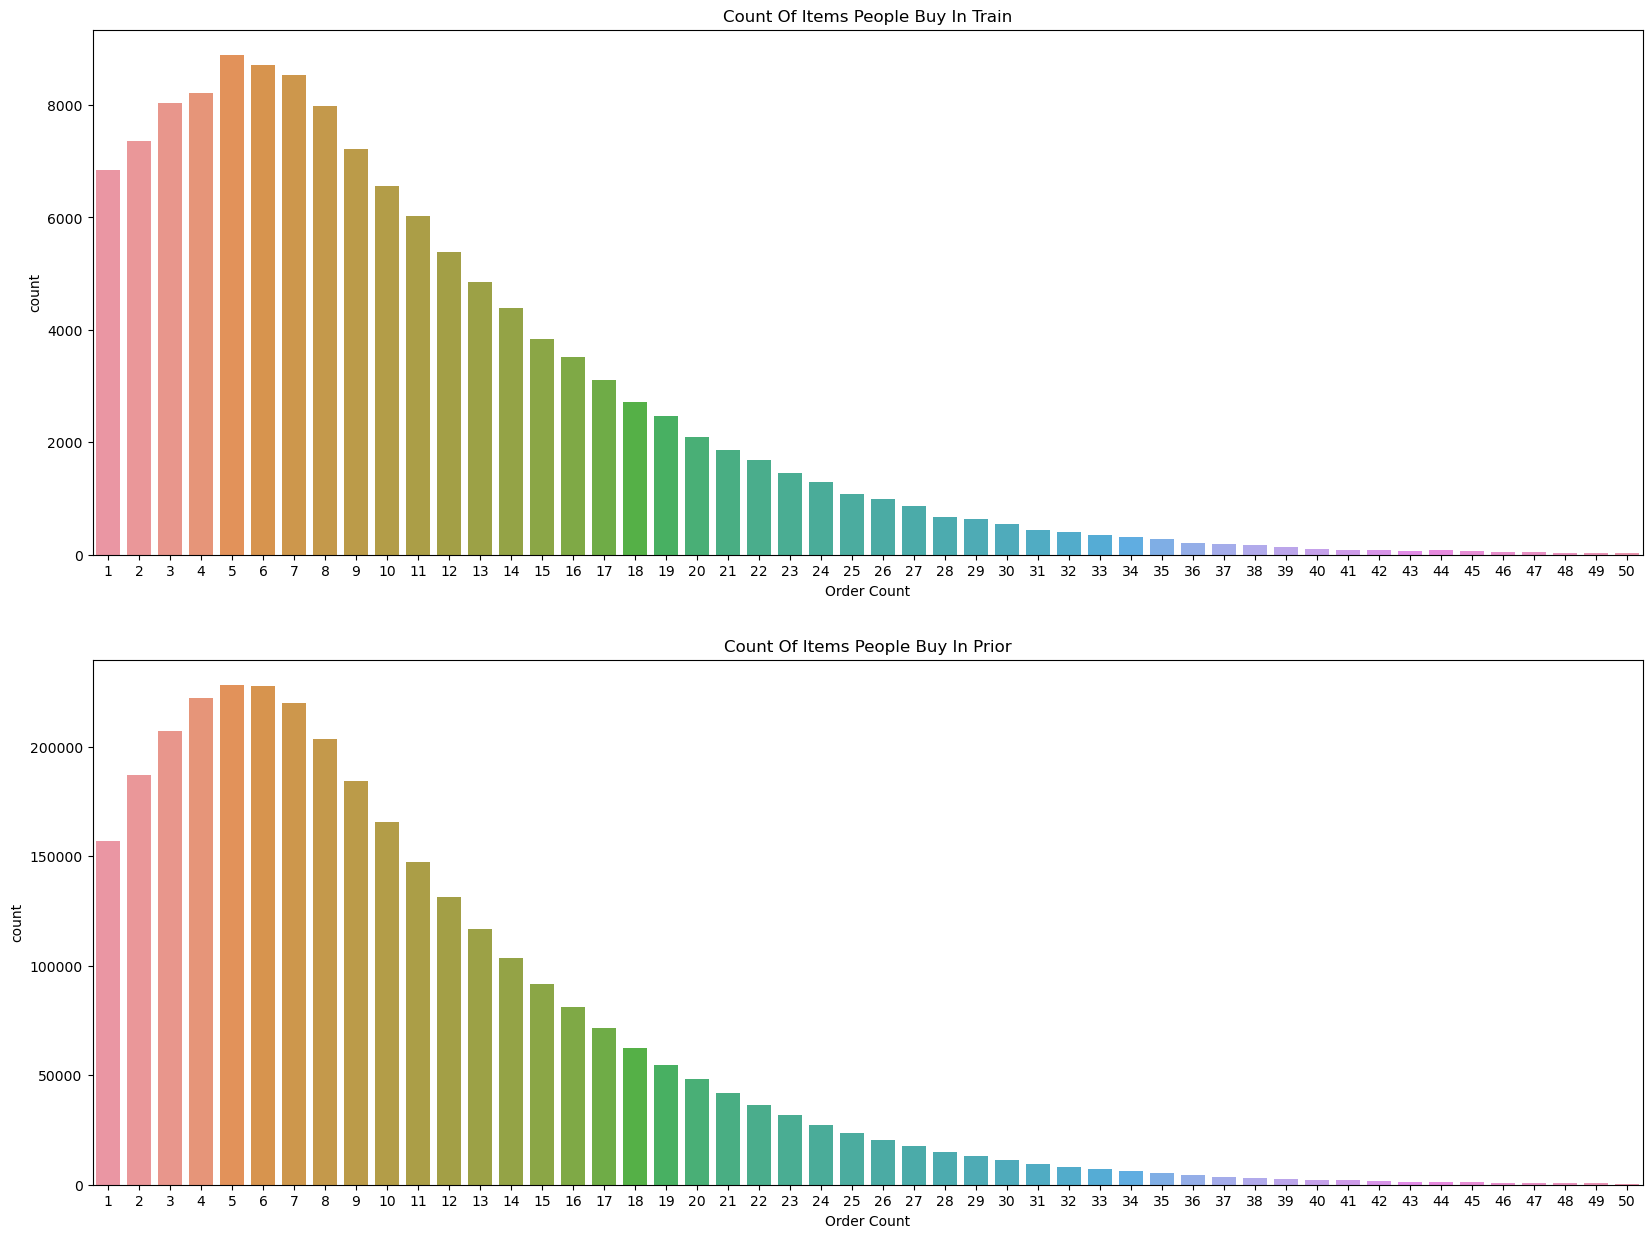

In [119]:
fig,(ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20,15)
orderCountsPrior = o_p_prior.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame()
orderCountsPrior["count"] = orderCountsPrior["product_id"]
orderCountsPrior["no_of_products"] = orderCountsPrior.index
orderCountsTrain = o_p_train.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame()
orderCountsTrain["count"] = orderCountsTrain["product_id"]
orderCountsTrain["no_of_products"] = orderCountsTrain.index
sns.barplot(data=orderCountsTrain.head(50),x="no_of_products",y="count",ax=ax1,)
sns.barplot(data=orderCountsPrior.head(50),x="no_of_products",y="count",ax=ax2,)
ax1.set(xlabel='Order Count',title="Count Of Items People Buy In Train")
ax2.set(xlabel='Order Count',title="Count Of Items People Buy In Prior");

In [122]:
o_test

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64